# Politics Dataset

## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-136-5bb0f5d05dad>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

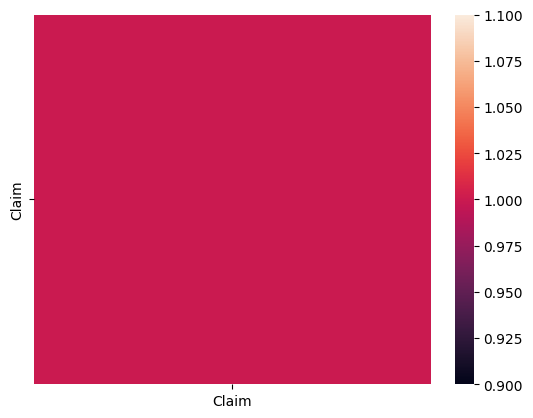

In [ ]:
#Correlation plot

sns.heatmap(df.corr())

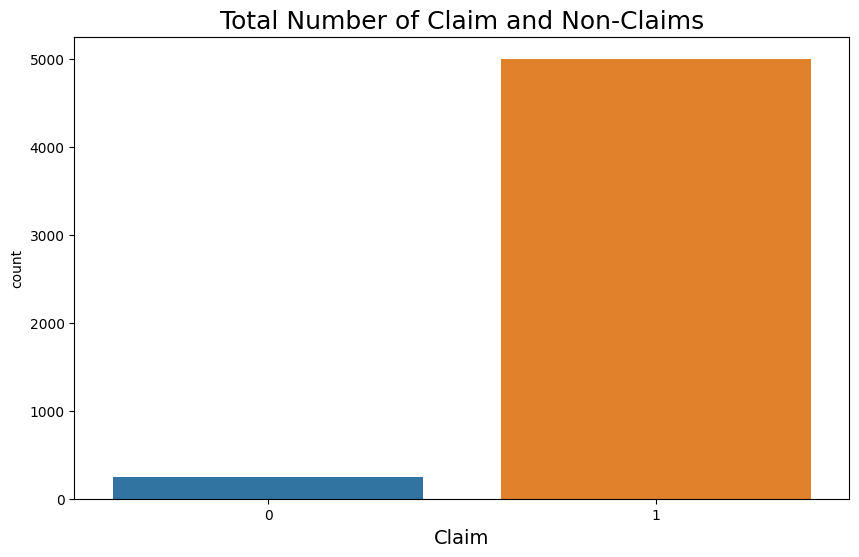

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Claim', data = df)
plt.title('Total Number of Claim and Non-Claims',size=18)
plt.xlabel('Claim',size=14)
plt.show()

## Read dataset file

In [ ]:
df = pd.read_excel('Final Labeled Dataset.xlsx')
df.head()

,Headlines,Relations,Subject,Object,Claim
0,Pakistan pulls out of India chess event,pulls out,Pakistan,India chess event,1
1,Police raid PTI leaders' homes ahead of Islama...,raid,Police,PTI leaders homes,1
2,Altaf Hussain goes on trial in London for 2016...,goes on trial,Altaf Hussain,London,1
3,New Jersey passes resolution condemning 1984 S...,passes,New Jersey,resolution condemning 1984 Sikh 'genocide' in ...,1
4,George Floyd's four-year-old niece shot at hom...,shot at,George Floyd's four-year-old niece,home,1


## Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Headlines   5253 non-null   object
 1   Relations   5253 non-null   object
 2   Subject     5243 non-null   object
 3   Object      5250 non-null   object
 4   Claim       5253 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 205.3+ KB


## Dataset Shape

In [ ]:
df.shape

(5253, 5)

In [ ]:
df.count()

Headlines     5253
Relations     5253
Subject       5243
Object        5250
Claim         5253
dtype: int64

## Check few titles from given range

In [ ]:
for index,text in enumerate(df['Headlines'][35:40]):
  print('News Headlines %d:\n'%(index+1),text)

News Headlines 1:
 Sindh govt misguiding people with false claims
News Headlines 2:
 Mustafa Kamal seeks autonomy for Karachi
News Headlines 3:
 Sindh launches Rs802.39b projects to 'transform' Karachi
News Headlines 4:
 PTI lawmaker points fingers at Sindh govt for rain devastation
News Headlines 5:
 PSP chief puts forward six-point plan to resolve Karachi's issues


## WordCloud

In [ ]:
from wordcloud import WordCloud
from collections import Counter

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=200)
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

### News Headlines

In [ ]:
df['Relations']

KeyError: ignored

In [ ]:
# Assuming your DataFrame is named 'df'
columns = df.columns
print(columns)


Index(['Headlines', 'Relations ', 'Subject', 'Object', 'Claim'], dtype='object')


In [ ]:
df['Relations ']

0           pulls out
1                raid
2       goes on trial
3              passes
4             shot at
            ...      
5248         arrested
5249            moves
5250            terms
5251         injured 
5252         suspends
Name: Relations , Length: 5253, dtype: object

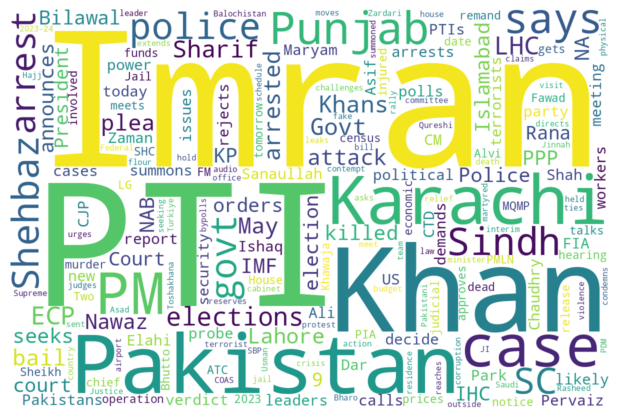

In [ ]:
tokens2 = df['Headlines'] \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

In [ ]:
df.Relations.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

AttributeError: ignored

<Axes: >

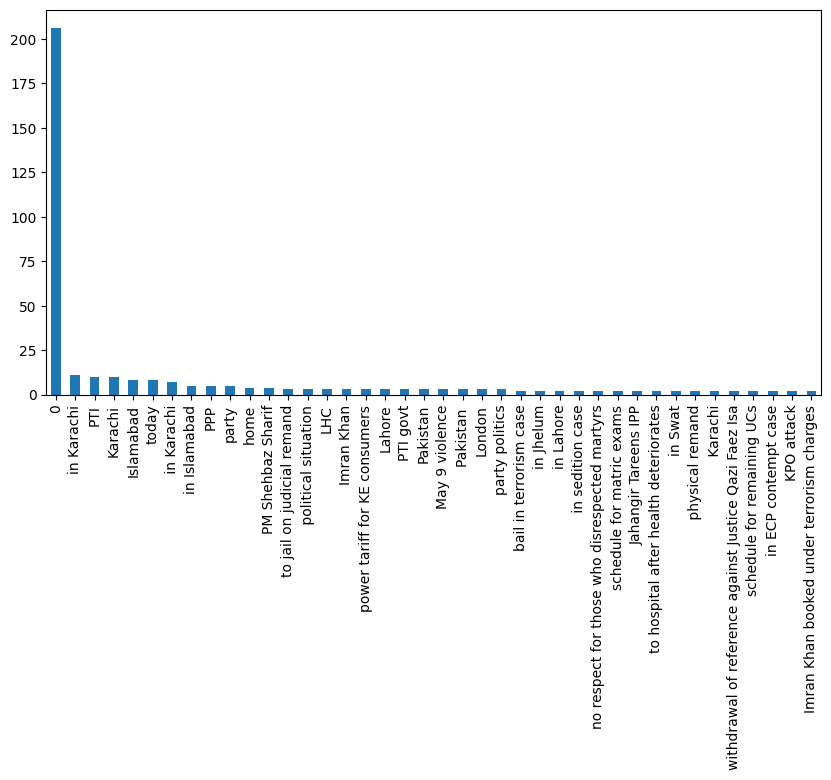

In [ ]:
df.Object.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

# Health Dataset

## Importing Libraries

## Read dataset file

In [ ]:
df = pd.read_csv('HealthNews.csv')
df.head()

,articleText,date_author,News Title
0,"LAHORE:\n\nTo mark World Health Day, a special...","Our Correspondent \nApril 08, 2023",‘29% of population suffering from diabetes’
1,PESHAWAR:\n\nA high level 13-member committee ...,"Our Correspondent \nApril 06, 2023",K-P readies plan to combat dengue
2,PESHAWAR:\n\nThe number of Covid-19 cases have...,"Our Correspondent \nApril 01, 2023",Covid-19 cases on the rise in K-P again
3,QUETTA:\n\nBalochistan cabinet on Friday appro...,"Syed Ali Shah \nApril 01, 2023",Balochistan cabinet approves health card
4,PESHAWAR:\n\nThe number of Covid-19 has jumped...,"Our Correspondent \nMarch 26, 2023",Seven new Covid-19 cases detected in K-P


## Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   articleText  2997 non-null   object
 1   date_author  2997 non-null   object
 2   News Title   2997 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


## Dataset Shape

In [ ]:
df.shape

(2997, 3)

In [ ]:
df.count()

articleText    2997
date_author    2997
News Title     2997
dtype: int64

## Checking Null values

In [ ]:
df.isnull().sum()

articleText    0
date_author    0
News Title     0
dtype: int64

## Unique titles

In [ ]:
uni = df['News Title'].unique()

In [ ]:
len(uni)

2992

## Check few titles from given range

In [ ]:
for index,text in enumerate(df['News Title'][35:40]):
  print('Titles %d:\n'%(index+1),text)

Titles 1:
 Pak-China sign MoU for medical innovation
Titles 2:
 Polio virus found in Peshawar, Faisalabad sewage
Titles 3:
 Regularisation of PHFMC staff discussed
Titles 4:
 100 children die of pneumonia every hour
Titles 5:
 Burdening the exchequer: Ghost doctors plague health system


## WordCloud

In [ ]:
from wordcloud import WordCloud
from collections import Counter

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800,
                   background_color="white",
                   max_words=200)
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

### Article Text

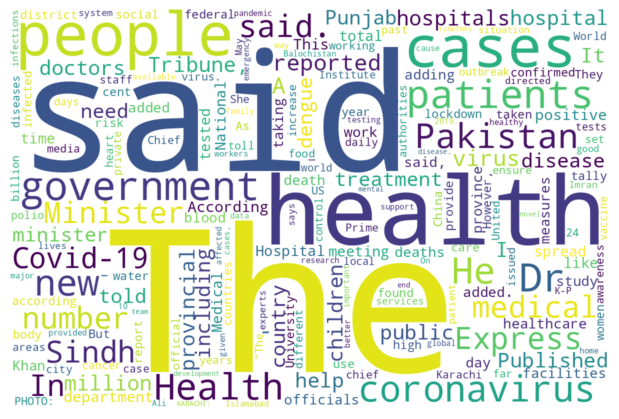

In [ ]:
tokens2 = df['articleText'] \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

### News Title

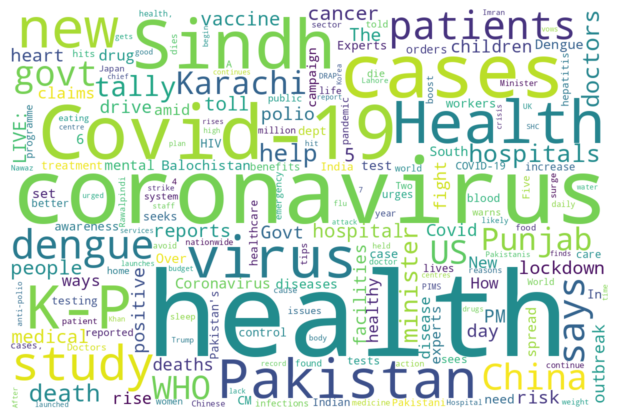

In [ ]:
tokens2 = df['News Title'] \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

## Most Common Words

In [ ]:

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(str(df['Headlines'][0]))
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['[', "'Pakistan", "'", ',', "'pulls", "'", ',', "'out", "'", ',', "'of", "'", ',', "'India", "'", ',', "'chess", "'", ',', "'event", "'", ']']
['[', "'Pakistan", "'", ',', "'pulls", "'", ',', "'out", "'", ',', "'of", "'", ',', "'India", "'", ',', "'chess", "'", ',', "'event", "'", ']']


In [ ]:
import nltk
from nltk.corpus import stopwords
from itertools import chain

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Headlines'] = df['Headlines'].apply(lambda x: [word for word in list(chain.from_iterable(str(x).split())) if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Relations '] = df['Relations '].apply(lambda x:str(x))

In [ ]:
df['Relations ']

0           pulls out
1                raid
2       goes on trial
3              passes
4             shot at
            ...      
5248         arrested
5249            moves
5250            terms
5251         injured 
5252         suspends
Name: Relations , Length: 5253, dtype: object

In [ ]:
top = Counter(df['Relations '])

In [ ]:
top

Counter({'pulls out': 2,
         'raid': 7,
         'goes on trial': 1,
         'passes': 15,
         'shot at': 1,
         'ban': 3,
         'resign': 3,
         'take oath': 2,
         'granted': 2,
         'throws out': 1,
         'refusal': 3,
         'expels': 1,
         'ordered': 5,
         'handed': 1,
         'condemns': 23,
         'seeks': 89,
         'rejection': 5,
         'challenge': 4,
         'break': 3,
         'expose': 12,
         'decided': 2,
         'uphold': 1,
         'accuses': 6,
         'died': 9,
         'lauds': 5,
         'expression': 1,
         'censure': 1,
         'hit by out': 2,
         'slams': 9,
         'guided by': 1,
         'belittles': 1,
         'misguided': 2,
         'launches': 17,
         'points fingers': 1,
         'puts forward': 1,
         'plans': 2,
         'regret': 1,
         'sees': 6,
         'gives nod': 2,
         'demands': 33,
         'snubs': 1,
         'blame': 3,
         'shoot d

In [ ]:

temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,says,213
2,arrest,142
3,seeks,89
4,killed,78
5,decide,59
6,orders,58
7,announce,55
8,rejects,51
9,announces,49
10,approves,44


In [ ]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Top 50 Frequent Relations', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()
fig.write_html('example_bar_chart.html')

In [ ]:
nltk.download('punkt')  # Download the Punkt tokenizer
sentences = [
    "This is the first sentence.",
    "The second sentence is longer than the first one.",
    "This is the third and final sentence."
]
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in df['Headlines']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentence_lengths = [len(tokens) for tokens in tokenized_sentences]


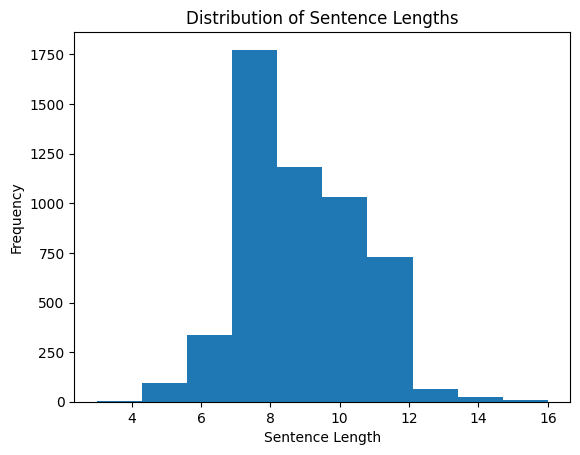

In [ ]:
plt.hist(sentence_lengths, bins=10)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()
